# Customer Churn

In [1]:
# We study the customer churn problem. The data set  
# is downloaded as follows:
# https://www.kaggle.com/abhinav89/telecom-customer
#
# They provide a number of features and the label set
# for churn of customers.
#
# We adopt four different approaches to tackle this 
# problem which are logistic regression, support vector
# classification, random forest classification and
# extreme gradient boost (XGBoost), respectively.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
train_ainfo=pd.read_csv("Train_AccountInfo.csv")
train_dgraph=pd.read_csv("Train_Demographics.csv")
train_sopt=pd.read_csv("Train_ServicesOptedFor.csv")
train_churn=pd.read_csv("Train.csv")

In [4]:
test_ainfo=pd.read_csv("Test_AccountInfo.csv")
test_dgraph=pd.read_csv("Test_Demographics.csv")
test_sopt=pd.read_csv("Test_ServicesOptedFor.csv")
test_churn=pd.read_csv("Test.csv")

In [5]:
train_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5298 entries, 0 to 5297
Data columns (total 2 columns):
CustomerID    5298 non-null object
Churn         5298 non-null object
dtypes: object(2)
memory usage: 82.9+ KB


In [6]:
train_ainfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5298 entries, 0 to 5297
Data columns (total 8 columns):
CustomerID           5298 non-null object
BaseCharges          5298 non-null float64
DOC                  5298 non-null object
TotalCharges         5290 non-null object
DOE                  5298 non-null object
ElectronicBilling    5298 non-null object
ContractType         5293 non-null object
PaymentMethod        5298 non-null object
dtypes: float64(1), object(7)
memory usage: 331.2+ KB


In [7]:
train_dgraph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5298 entries, 0 to 5297
Data columns (total 8 columns):
HouseholdID      5298 non-null object
Country          5298 non-null object
State            5298 non-null object
Retired          5298 non-null int64
HasPartner       5298 non-null int64
HasDependents    5298 non-null int64
Education        5288 non-null object
Gender           5294 non-null object
dtypes: int64(3), object(5)
memory usage: 331.2+ KB


In [8]:
train_sopt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47682 entries, 0 to 47681
Data columns (total 3 columns):
CustomerID       47682 non-null object
TypeOfService    47682 non-null object
SeviceDetails    47682 non-null object
dtypes: object(3)
memory usage: 1.1+ MB


In [9]:
train_churn.head()

,CustomerID,Churn
0,Cust4327,Yes
1,Cust3826,No
2,Cust6200,No
3,Cust1467,No
4,Cust4843,No


In [10]:
train_ainfo.head()

,CustomerID,BaseCharges,DOC,TotalCharges,DOE,ElectronicBilling,ContractType,PaymentMethod
0,Cust1450,417.75,5-1-2012,3400.25,10-May-11,Yes,Month-to-month,Electronic check
1,Cust4452,500.00,5-1-2012,7673.75,12-Sep-10,Yes,Month-to-month,Electronic check
2,Cust1681,394.00,5-1-2012,8206.5,15-May-10,No,Month-to-month,Electronic check
3,Cust4761,398.75,5-1-2012,5559.25,12-Oct-10,Yes,Month-to-month,Electronic check
4,Cust1785,447.25,5-1-2012,4265.5,10-Apr-11,No,Month-to-month,Electronic check


In [11]:
train_dgraph.head()

,HouseholdID,Country,State,Retired,HasPartner,HasDependents,Education,Gender
0,Cust5390,India,Maharashtra,0,2,2,Graduation,Female
1,Cust4417,India,Maharashtra,1,1,2,Highschool or below,Male
2,Cust4377,India,Maharashtra,0,1,2,Highschool or below,Female
3,Cust5271,India,Maharashtra,0,2,2,Masters,Female
4,Cust4914,India,Maharashtra,0,1,2,Highschool or below,Female


In [12]:
train_sopt.head()

,CustomerID,TypeOfService,SeviceDetails
0,Cust2034,MultipleLines,No
1,Cust4545,OnlineSecurity,No internet service
2,Cust2067,StreamingTelevision,No internet service
3,Cust1885,OnlineSecurity,No internet service
4,Cust4663,MultipleLines,No


# Data Preprocessing

In [13]:
# Preprocess train_churn & test_churn

In [14]:
train_churn["CustomerID"]=train_churn["CustomerID"].str.replace("Cust","")
test_churn["CustomerID"]=test_churn["CustomerID"].str.replace("Cust","")

In [15]:
train_churn["CustomerID"]=train_churn["CustomerID"].apply(int)
test_churn["CustomerID"]=test_churn["CustomerID"].apply(int)

In [16]:
train_churn=train_churn.sort_values(by="CustomerID")
test_churn=test_churn.sort_values(by="CustomerID")

In [17]:
train_churn.set_index("CustomerID",inplace=True)

In [18]:
train_churn=pd.get_dummies(train_churn["Churn"],drop_first=True)

In [19]:
train_churn.columns=["Churn"]

In [20]:
train_churn.head()

,Churn
CustomerID,
1201,0
1202,0
1203,0
1204,0
1205,1


In [21]:
# Preprocess train_dgraph & test_dgraph

In [22]:
train_dgraph["HouseholdID"]=train_dgraph["HouseholdID"].str.replace("Cust","")
test_dgraph["HouseholdID"]=test_dgraph["HouseholdID"].str.replace("Cust","")

In [23]:
train_dgraph["HouseholdID"]=train_dgraph["HouseholdID"].apply(int)
test_dgraph["HouseholdID"]=test_dgraph["HouseholdID"].apply(int)

In [24]:
train_dgraph=train_dgraph.sort_values(by="HouseholdID")
test_dgraph=test_dgraph.sort_values(by="HouseholdID")

In [25]:
train_dgraph=train_dgraph.set_index("HouseholdID")
test_dgraph=test_dgraph.set_index("HouseholdID")

In [26]:
train_dgraph.index.name="CustomerID"
test_dgraph.index.name="CustomerID"

In [27]:
# Fill na with the most frequent count

In [28]:
E=train_dgraph["Education"].value_counts()
train_dgraph["Education"].fillna(E.index[0],inplace=True)
E=test_dgraph["Education"].value_counts()
test_dgraph["Education"].fillna(E.index[0],inplace=True)

In [29]:
G=train_dgraph["Gender"].value_counts()
train_dgraph["Gender"].fillna(G.index[0],inplace=True)
G=test_dgraph["Gender"].value_counts()
test_dgraph["Gender"].fillna(G.index[0],inplace=True)

In [30]:
train_dgraph=pd.concat([train_dgraph,pd.get_dummies(train_dgraph[["Country","Education","Gender"]],drop_first=True),pd.get_dummies(train_dgraph[["State"]],drop_first=True)],axis=1)
test_dgraph=pd.concat([test_dgraph,pd.get_dummies(test_dgraph[["Country","Education","Gender"]],drop_first=True),pd.get_dummies(test_dgraph[["State"]])],axis=1)

In [31]:
train_dgraph.drop(["Country","State","Education","Gender"],axis=1,inplace=True)
test_dgraph.drop(["Country","State","Education","Gender"],axis=1,inplace=True)

In [32]:
train_dgraph.head()

,Retired,HasPartner,HasDependents,Country_India,Education_Highschool or below,Education_Masters,Education_Other,Education_ProfessionalQalification,Gender_Male,State_Maharashtra
CustomerID,,,,,,,,,,
1201,0,2,2,1,0,1,0,0,1,1
1202,0,2,2,1,0,0,0,1,1,1
1203,0,2,2,1,0,0,0,1,1,1
1204,0,2,1,1,0,0,0,1,1,1
1205,0,2,2,1,0,0,0,1,0,1


In [33]:
# Preprocess train_ainfo & test_ainfo 

In [34]:
train_ainfo.drop(["DOC","DOE"],axis=1,inplace=True)
test_ainfo.drop(["DOC","DOE"],axis=1,inplace=True)

In [35]:
train_ainfo["CustomerID"]=train_ainfo["CustomerID"].str.replace("Cust","")
test_ainfo["CustomerID"]=test_ainfo["CustomerID"].str.replace("Cust","")

In [36]:
train_ainfo["CustomerID"]=train_ainfo["CustomerID"].apply(int)
test_ainfo["CustomerID"]=test_ainfo["CustomerID"].apply(int)

In [37]:
train_ainfo=train_ainfo.sort_values("CustomerID")
test_ainfo=test_ainfo.sort_values("CustomerID")

In [38]:
train_ainfo=train_ainfo.set_index("CustomerID")
test_ainfo=test_ainfo.set_index("CustomerID")

In [39]:
import re

In [40]:
train_ainfo['TotalCharges']=train_ainfo['TotalCharges'].str.replace(r'[\D]+','0')
test_ainfo['TotalCharges']=test_ainfo['TotalCharges'].str.replace(r'[\D]+','0')

In [41]:
train_ainfo['TotalCharges']=train_ainfo['TotalCharges'].apply(float)
test_ainfo['TotalCharges']=test_ainfo['TotalCharges'].apply(float)

In [42]:
train_ainfo['TotalCharges'].fillna(np.mean(train_ainfo['TotalCharges']),inplace=True)
test_ainfo['TotalCharges'].fillna(np.mean(test_ainfo['TotalCharges']),inplace=True)

In [43]:
CT=train_ainfo["ContractType"].value_counts()
train_ainfo["ContractType"].fillna(CT[0],inplace=True)
CT=test_ainfo["ContractType"].value_counts()
test_ainfo["ContractType"].fillna(CT[0],inplace=True)

In [44]:
train_ainfo=pd.concat([train_ainfo,pd.get_dummies(train_ainfo[["ElectronicBilling","ContractType","PaymentMethod"]],drop_first=True)],axis=1)
test_ainfo=pd.concat([test_ainfo,pd.get_dummies(test_ainfo[["ElectronicBilling","ContractType","PaymentMethod"]],drop_first=True)],axis=1)

In [45]:
row,col=test_ainfo.shape
id=9
miss_col=[0]*row
test_ainfo.insert(loc=id, column='PaymentMethod_Credit card (automatic)', value=miss_col)

In [46]:
train_ainfo.drop(["ElectronicBilling","ContractType","PaymentMethod"],axis=1,inplace=True)
test_ainfo.drop(["ElectronicBilling","ContractType","PaymentMethod"],axis=1,inplace=True)

In [47]:
train_ainfo.head()

,BaseCharges,TotalCharges,ElectronicBilling_Yes,ContractType_Month-to-month,ContractType_One year,ContractType_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
CustomerID,,,,,,,,,
1201,478.50,5920.0,0,0,1,0,0,1,0
1202,103.25,103025.0,0,1,0,0,0,1,0
1203,399.75,5217.0,1,1,0,0,0,0,0
1204,324.75,2275705.0,0,0,1,0,0,0,0
1205,372.50,37205.0,1,1,0,0,0,1,0


In [48]:
# Preprocess train_sopt & test_sopt

In [49]:
train_sopt["CustomerID"]=train_sopt["CustomerID"].str.replace("Cust","")
train_sopt["CustomerID"]=train_sopt["CustomerID"].apply(int)
test_sopt["CustomerID"]=test_sopt["CustomerID"].str.replace("Cust","")
test_sopt["CustomerID"]=test_sopt["CustomerID"].apply(int)

In [50]:
train_sopt=train_sopt.sort_values(by="CustomerID")
test_sopt=test_sopt.sort_values(by="CustomerID")

In [51]:
train_sopt=train_sopt.pivot(index='CustomerID',columns='TypeOfService',values='SeviceDetails')
test_sopt=test_sopt.pivot(index='CustomerID',columns='TypeOfService',values='SeviceDetails')

In [52]:
column=train_sopt.columns.tolist()
train_sopt.columns=column
test_sopt.columns=column

In [53]:
train_sopt["HasPhoneService"]=train_sopt["HasPhoneService"].apply(int)
test_sopt["HasPhoneService"]=test_sopt["HasPhoneService"].apply(int)

In [54]:
column.remove("HasPhoneService")

In [55]:
train_sopt=pd.concat([train_sopt,pd.get_dummies(train_sopt[column],drop_first=True)],axis=1)
test_sopt=pd.concat([test_sopt,pd.get_dummies(test_sopt[column],drop_first=True)],axis=1)

In [56]:
train_sopt.drop(column,axis=1,inplace=True)
test_sopt.drop(column,axis=1,inplace=True)

In [57]:
train_sopt.head()

,HasPhoneService,DeviceProtection_No internet service,DeviceProtection_Yes,InternetServiceCategory_Fiber optic,InternetServiceCategory_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTelevision_No internet service,StreamingTelevision_Yes,TechnicalSupport_No internet service,TechnicalSupport_Yes
CustomerID,,,,,,,,,,,,,,,,,
1201,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1202,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0
1203,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1204,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
1205,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [58]:
# Concatenate train_ainfo, train_dgraph & train_sopt into train set
# Concatenate test_ainfo, test_dgraph & test_sopt into test set

In [59]:
train=pd.concat([train_ainfo,train_dgraph,train_sopt],axis=1)
test=pd.concat([test_ainfo,test_dgraph,test_sopt],axis=1)

In [60]:
# Now the train and test sets has 36 features.

In [61]:
train.head()

,BaseCharges,TotalCharges,ElectronicBilling_Yes,ContractType_Month-to-month,ContractType_One year,ContractType_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Retired,...,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTelevision_No internet service,StreamingTelevision_Yes,TechnicalSupport_No internet service,TechnicalSupport_Yes
CustomerID,,,,,,,,,,,,,,,,,,,,,
1201,478.50,5920.0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1202,103.25,103025.0,0,1,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
1203,399.75,5217.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1204,324.75,2275705.0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1205,372.50,37205.0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
test.head()

,BaseCharges,TotalCharges,ElectronicBilling_Yes,ContractType_Month-to-month,ContractType_One year,ContractType_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Retired,...,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTelevision_No internet service,StreamingTelevision_Yes,TechnicalSupport_No internet service,TechnicalSupport_Yes
CustomerID,,,,,,,,,,,,,,,,,,,,,
11201,284.75,944705.0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
11202,280.75,17439075.0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
11203,249.75,2937025.0,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
11204,450.25,931405.0,1,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
11205,198.25,198025.0,1,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


# Splitting the data set into train and test sets

In [63]:
X=train.values
y=train_churn.values

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

# Logistic Regression

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [67]:
steps=[('scale',StandardScaler()),('clf',LogisticRegression())]
pipeline=Pipeline(steps)

In [68]:
param_dist={'clf__C':np.arange(1,2000)/500}

In [69]:
clf_cv=RandomizedSearchCV(pipeline,param_dist)

In [70]:
clf_cv.fit(X_train,y_train)

C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'clf__C': array([  2.00000e-03,   4.00000e-03, ...,   3.99600e+00,   3.99800e+00])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [71]:
# The best parameter of Logistic Regression
clf_cv.best_params_

{'clf__C': 0.042000000000000003}

In [72]:
print("Score of training set is {}".format(clf_cv.score(X_train,y_train)))
print("Score of testing set is {}".format(clf_cv.score(X_test,y_test)))

Score of training set is 0.8213780084945729
Score of testing set is 0.7886792452830189


In [73]:
# Prediction of y 
y_pred=clf_cv.predict(X_test)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [75]:
# Classification Report 
print(classification_report(y_test,y_pred,target_names=['No','Yes']))

             precision    recall  f1-score   support

         No       0.84      0.89      0.86       788
        Yes       0.61      0.51      0.55       272

avg / total       0.78      0.79      0.78      1060



In [76]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[698  90]
 [134 138]]


In [77]:
# Plot of ROC curve

In [78]:
y_pred_prob=clf_cv.predict_proba(X_test)[:,1]

In [79]:
import matplotlib.pyplot as plt
fpr,tpr, thresholds=roc_curve(y_test,y_pred_prob)

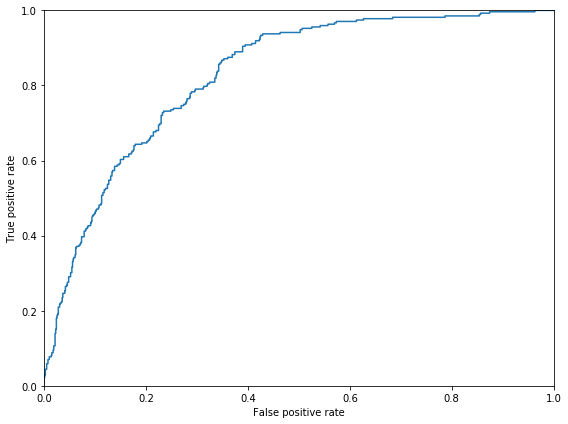

In [80]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr)
plt.xlim(xmax=1,xmin=0)
plt.ylim(ymax=1,ymin=0)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.tight_layout()
plt.show()

In [81]:
# Area under ROC curve
roc_auc_score(y_test,y_pred_prob)

0.82700292997909819

# Support vector classification

In [82]:
from sklearn.svm import SVC

In [83]:
steps=[('scale',StandardScaler()),('clf',SVC())]
pipeline=Pipeline(steps)

In [84]:
param_dist={'clf__C':np.arange(1,500)/500,'clf__gamma':[1e-3,5e-2,1e-2,5e-1,1e-1,0.5]}

In [85]:
clf_cv=RandomizedSearchCV(pipeline,param_dist)

In [86]:
clf_cv.fit(X_train,y_train)

C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'clf__C': array([ 0.002,  0.004, ...,  0.996,  0.998]), 'clf__gamma': [0.001, 0.05, 0.01, 0.5, 0.1, 0.5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [87]:
# The best parameter of Logistic Regression
clf_cv.best_params_

{'clf__C': 0.5, 'clf__gamma': 0.01}

In [88]:
print("Score of training set is {}".format(clf_cv.score(X_train,y_train)))
print("Score of testing set is {}".format(clf_cv.score(X_test,y_test)))

Score of training set is 0.8187824445493157
Score of testing set is 0.7830188679245284


# Random Forest Classification

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
steps=[('scale',StandardScaler()),('clf',RandomForestClassifier())]
pipeline=Pipeline(steps)

In [91]:
param_dist={'clf__n_estimators':np.arange(10,100,5),'clf__max_depth':np.arange(5,100,5)}

In [92]:
clf_cv=RandomizedSearchCV(pipeline,param_dist)

In [93]:
clf_cv.fit(X_train,y_train)

C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
      ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'clf__n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95]), 'clf__max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [94]:
# The best parameter of Logistic Regression
clf_cv.best_params_

{'clf__max_depth': 65, 'clf__n_estimators': 55}

In [95]:
print("Score of training set is {}".format(clf_cv.score(X_train,y_train)))
print("Score of testing set is {}".format(clf_cv.score(X_test,y_test)))

Score of training set is 0.9992921189240208
Score of testing set is 0.7811320754716982


# XG Boost Method

In [96]:
import xgboost as xgb

C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [97]:
steps=[('scale',StandardScaler()),('clf',xgb.XGBClassifier(objective='binary:logistic'))]
pipeline=Pipeline(steps)

In [98]:
param_dist={'clf__learning_rate':[0.005,0.01,0.05,.1,.5,1],'clf__n_estimators':np.arange(10,100,5),'clf__max_depth':np.arange(5,100,5),'clf__subsample': np.arange(0.05,1.05,.05),'clf__reg_alpha':np.arange(1,500)/500}

In [99]:
xg_clf=RandomizedSearchCV(pipeline,param_dist)

In [100]:
xg_clf.fit(X_train,y_train)

C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HoT\Anaconda3_2\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'clf__learning_rate': [0.005, 0.01, 0.05, 0.1, 0.5, 1], 'clf__n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95]), 'clf__max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95]), 'clf... 0.85,  0.9 ,
        0.95,  1.  ]), 'clf__reg_alpha': array([ 0.002,  0.004, ...,  0.996,  0.998])},
          p

In [101]:
# The best parameter of Logistic Regression
xg_clf.best_params_

{'clf__learning_rate': 0.1,
 'clf__max_depth': 95,
 'clf__n_estimators': 75,
 'clf__reg_alpha': 0.28399999999999997,
 'clf__subsample': 0.10000000000000001}

In [102]:
print("Score of training set is {}".format(xg_clf.score(X_train,y_train)))
print("Score of testing set is {}".format(xg_clf.score(X_test,y_test)))

Score of training set is 0.8449740443605475
Score of testing set is 0.7943396226415095
